[View in Colaboratory](https://colab.research.google.com/github/Fawziya/Playgroud/blob/master/Jian_Yu_%E7%AC%AC%E4%B8%80%E9%98%B6%E6%AE%B5_%E4%BD%9C%E4%B8%9A3.ipynb)

In [1]:
############# Homework #1 ########################
# Assume the dataset is a list
a = [10,20,30,20,10,50,60,40,80,50,40]
# Method 1 - use set() function to remove duplicates in the list
uniq_date = set(a)
# Method 2 - create a function to remove duplicate in the list
def RmDup(orig_list):
  uniq_list = []
  for i in orig_list:
    if i not in uniq_list:
      uniq_list.append(i)
  return uniq_list

final_list = RmDup(a)
print(final_list)



[10, 20, 30, 50, 60, 40, 80]


In [0]:
############# Homework #2 ########################
############### Python #######################
import pandas as pd
import numpy as np
ReqData = []
ReqCol = ['requestor_id','sent_to_id','time']
friend_request = pd.DataFrame(ReqData,columns=ReqCol)
Req_Grouped = friend_request.groupby(['requestor_id','sent_to_id']).size()
Num_Requested = 0
for i in Req_Grouped:
  Num_Requested = Num_Requested+1

AcpData = []
AcpCol = ['requestor_id','acceptor_id','time']
request_accepted = pd.DataFrame(AcpData,columns=AcpCol)
Acp_Grouped = request_accepted.groupby(['requestor_id','acceptor_id']).size()
Num_Accepted = 0
for i in Acp_Grouped:
  Num_Accepted = Num_Accepted+1

if (Num_Accepted = 0) or (Num_Requested = 0):
    acceptance_rate = 0
else:
    acceptance_rate = Num_Accepted/Num_Requested
    
############### SQL #######################

SELECT ROUND(IFNULL((SELECT COUNT(DISTINCT requestor_id, acceptor_id) FROM request_accepted AS Num_accepted)
              /
              (SELECT COUNT(DISTINCT requestor_id, sent_to_id) FROM friend_request AS Num_Requested),
              0),2) AS acceptance_rate;

In [71]:
############# Homework #3 ########################
credit_cards = ['4175004175004172','4917491749174917','346416800707698',\
                '376416800707698','37641680070769832112','36641680070769','54545641680070769']
issuer=''

def issue(card_num):
  global issuer
  if (card_num.startswith('4026') or card_num.startswith('417500') or \
     card_num.startswith('4405') or card_num.startswith('4508') or \
     card_num.startswith('4844') or card_num.startswith('4913') or \
     card_num.startswith('4917')) and (len(card_num) == 16):
     issuer = 'VISAELECTRON'
  elif (card_num.startswith('4')) and (len(card_num) == 16):
     issuer = 'VISA'
  elif (card_num.startswith('37') or card_num.startswith('34')) and (len(card_num) == 15):
     issuer = 'AMEX'
  elif (card_num.startswith('36')) and (len(card_num) == 14):
     issuer = 'Diners Club'
  else:
     issuer = 'UNKNOWN!'
  return issuer

for cc in credit_cards:
  print(issue(cc))

VISAELECTRON
VISAELECTRON
AMEX
AMEX
UNKNOWN!
Diners Club
UNKNOWN!


In [2]:
############# Homework #4 ########################
import pandas as pd

from google.colab import files
uploaded = files.upload()

for fn in uploaded:
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BA501_python_data.csv to BA501_python_data.csv
User uploaded file "BA501_python_data.csv" with length 6058269 bytes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


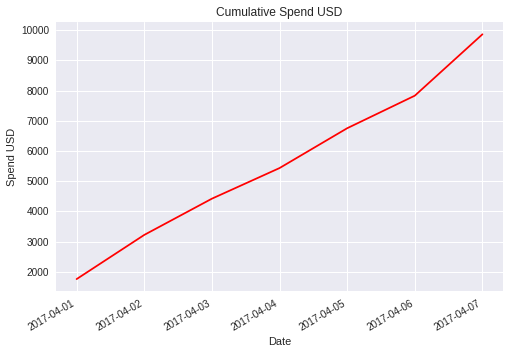

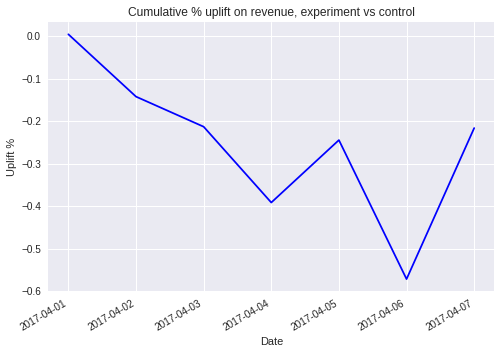

In [189]:
import io
import numpy as np
import datetime
import matplotlib.pyplot as plt

my_data = pd.read_csv(io.StringIO(uploaded['BA501_python_data.csv'].decode('utf-8')))
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')

def PrintCumulativeTimeSeries(experiment_id,country,vertical):
  global my_data
  # get time series
  table = my_data[my_data.experiment_id == experiment_id][my_data.country == country][my_data.vertical == vertical]
  series = table.groupby('date')['spend_usd'].sum()
  cum_series = series.groupby(series.index.month).cumsum()
 
  # plot uplift plot
  fig, ax = plt.subplots()
  ax.plot(cum_series,c='red')
  
  plt.gcf().autofmt_xdate()
  ax.set_title("Cumulative Spend USD")
  ax.set_ylabel("Spend USD")
  ax.set_xlabel("Date")

  # calculate cumulative % uplift
  ids = np.unique(my_data['experiment_id'])
  
  for i in ids:
    if i == experiment_id:
      experiment = i
    else:
      control = i
  
  exp_table = my_data[my_data.experiment_id == experiment][my_data.country == country][my_data.vertical == vertical]
  ctrl_table = my_data[my_data.experiment_id == control][my_data.country == country][my_data.vertical == vertical]
  
  exp_series = exp_table.groupby('date')['spend_usd'].sum()
  ctrl_series = ctrl_table.groupby('date')['spend_usd'].sum()
  
  cum_percentage_series = exp_series/ctrl_series - 1
  cum_percentage_series = cum_percentage_series.groupby(series.index.month).cumsum()
  
  # plot cumulative % uplift
  fig, bx = plt.subplots()
  bx.plot(cum_percentage_series,c='blue')
  
  plt.gcf().autofmt_xdate()
  bx.set_title("Cumulative % uplift on revenue, experiment vs control")
  bx.set_ylabel("Uplift %")
  bx.set_xlabel("Date")
  
PrintCumulativeTimeSeries(12624548,'FR','ANDROID_APPS')